# **Predicting Employee Retention**

### Objective

The objective of this assignment is to develop a Logistic Regression model. You will be using this model to analyse and predict binary outcomes based on the input data. This assignment aims to enhance understanding of logistic regression, including its assumptions, implementation, and evaluation, to effectively classify and interpret data.


### Business Objective

A mid-sized technology company wants to improve its understanding of employee retention to foster a loyal and committed workforce. While the organization has traditionally focused on addressing turnover, it recognises the value of proactively identifying employees likely to stay and understanding the factors contributing to their loyalty.


In this assignment you’ll be building a logistic regression model to predict the likelihood of employee retention based on the data such as demographic details, job satisfaction scores, performance metrics, and tenure. The aim is to provide the HR department with actionable insights to strengthen retention strategies, create a supportive work environment, and increase the overall stability and satisfaction of the workforce.

## Assignment Tasks

You need to perform the following steps to complete this assignment:
1. Data Understanding
2. Data Cleaning
3. Train Validation Split
4. EDA on training data
5. EDA on validation data [Optional]
6. Feature Engineering
7. Model Building
8. Prediction and Model Evaluation




## Data Dictionary

The data has 24 Columns and 74610 Rows. Following data dictionary provides the description for each column present in dataset:<br>

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Employee ID</td>
      <td>A unique identifier assigned to each employee.</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>The age of the employee, ranging from 18 to 60 years.</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>The gender of the employee.</td>
    </tr>
    <tr>
      <td>Years at Company</td>
      <td>The number of years the employee has been working at the company.</td>
    </tr>
    <tr>
      <td>Monthly Income</td>
      <td>The monthly salary of the employee, in dollars.</td>
    </tr>
    <tr>
      <td>Job Role</td>
      <td>The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.</td>
    </tr>
    <tr>
      <td>Work-Life Balance</td>
      <td>The employee's perceived balance between work and personal life (Poor, Below Average, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Job Satisfaction</td>
      <td>The employee's satisfaction with their job (Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Performance Rating</td>
      <td>The employee's performance rating (Low, Below Average, Average, High).</td>
    </tr>
    <tr>
      <td>Number of Promotions</td>
      <td>The total number of promotions the employee has received.</td>
    </tr>
     </tr>
     <tr>
      <td>Overtime</td>
      <td>Number of overtime hours.</td>
    </tr>
    <tr>
      <td>Distance from Home</td>
      <td>The distance between the employee's home and workplace, in miles.</td>
    </tr>
    <tr>
      <td>Education Level</td>
      <td>The highest education level attained by the employee (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD).</td>
    </tr>
    <tr>
      <td>Marital Status</td>
      <td>The marital status of the employee (Divorced, Married, Single).</td>
    </tr>
     <tr>
      <td>Number of Dependents</td>
      <td>Number of dependents the employee has.</td>
    </tr>
    <tr>
      <td>Job Level</td>
      <td>The job level of the employee (Entry, Mid, Senior).</td>
    </tr>
    <tr>
      <td>Company Size</td>
      <td>The size of the company the employee works for (Small, Medium, Large).</td>
    </tr>
    <tr>
      <td>Company Tenure (In Months)</td>
      <td>The total number of years the employee has been working in the industry.</td>
    </tr>
    <tr>
      <td>Remote Work</td>
      <td>Whether the employee works remotely (Yes or No).</td>
    </tr>
    <tr>
      <td>Leadership Opportunities</td>
      <td>Whether the employee has leadership opportunities (Yes or No).</td>
    </tr>
    <tr>
      <td>Innovation Opportunities</td>
      <td>Whether the employee has opportunities for innovation (Yes or No).</td>
    </tr>
    <tr>
      <td>Company Reputation</td>
      <td>The employee's perception of the company's reputation (Very Poor, Poor, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Employee Recognition</td>
      <td>The level of recognition the employee receives(Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Attrition</td>
      <td>Whether the employee has left the company.</td>
    </tr>
  </tbody>
</table>


## **1. Data Understanding**

In this step, load the dataset and check basic statistics of the data, including preview of data, dimension of data, column descriptions and data types.

### **1.0 Import Libraries**

In [159]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [160]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.feature_selection import RFE
sns.set(style="whitegrid")

### **1.1 Load the Data**

In [161]:
# Load the dataset
DATA_PATH = ("/content/Employee_data.csv")
df = pd.read_csv(DATA_PATH)

In [162]:
# Check the first few entries
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed


In [163]:
# Inspect the shape of the dataset
df.shape

(74610, 24)

In [164]:
# Inspect the different columns in the dataset
df.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size',
       'Company Tenure (In Months)', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

### **1.2 Check the basic statistics**

In [165]:
# Check the summary of the dataset
print("\nNumerical summary:")
display(df.describe(include=[np.number]).T)

print("\nCategorical summary (top levels):")
display(df.describe(include=['object', 'category']).T)



Numerical summary:


,count,mean,std,min,25%,50%,75%,max
Employee ID,74610.0,37246.028696,21505.785344,1.0,18624.25,37239.5,55871.75,74498.0
Age,74610.0,38.529379,12.082299,18.0,28.00,39.0,49.00,59.0
Years at Company,74610.0,15.722638,11.224059,1.0,7.00,13.0,23.00,51.0
Monthly Income,74610.0,7344.931417,2596.373589,1226.0,5652.00,7348.5,8876.00,50030.0
Number of Promotions,74610.0,0.832958,0.995326,0.0,0.00,1.0,2.00,4.0
Distance from Home,72698.0,49.990839,28.519135,1.0,25.00,50.0,75.00,99.0
Number of Dependents,74610.0,1.657432,1.579862,0.0,0.00,1.0,3.00,15.0
Company Tenure (In Months),72197.0,55.711899,25.392325,2.0,36.00,56.0,76.00,128.0



Categorical summary (top levels):


,count,unique,top,freq
Gender,74610,2,Male,40898
Job Role,74610,5,Technology,19350
Work-Life Balance,74610,4,Good,28196
Job Satisfaction,74610,4,High,37306
Performance Rating,74610,4,Average,44786
Overtime,74610,2,No,50230
Education Level,74610,5,Bachelorâ€™s Degree,22365
Marital Status,74610,3,Married,37470
Job Level,74610,3,Entry,29820
Company Size,74610,3,Medium,37281


### **1.3 Check the data type of columns**

In [166]:
# Check the info to see the types of the feature variables and the null values present
display(df.info())
df.isna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

None

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74605,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
74606,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
74607,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
74608,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## **2. Data Cleaning** <font color = red>[15 marks]</font>


In [167]:
# 2.0 Make a working copy
data = df.copy()

### **2.1 Handle the missing values** <font color = red>[10 marks]</font>

2.1.1 Check the number of missing values <font color="red">[2 Mark]</font>

In [168]:
# Check the number of missing values in each column
data.isnull().sum()

,0
Employee ID,0
Age,0
Gender,0
Years at Company,0
Job Role,0
Monthly Income,0
Work-Life Balance,0
Job Satisfaction,0
Performance Rating,0
Number of Promotions,0


2.1.2 Check the percentage of missing values <font color="red">[2 Marks]</font>

In [169]:
# Check the percentage of missing values in each column
data.isnull().sum()/len(data)*100

,0
Employee ID,0.000000
Age,0.000000
Gender,0.000000
Years at Company,0.000000
Job Role,0.000000
Monthly Income,0.000000
Work-Life Balance,0.000000
Job Satisfaction,0.000000
Performance Rating,0.000000
Number of Promotions,0.000000


2.1.3 Handle rows with missing values <font color="red">[4 Marks]</font>

In [170]:
# Handle the missing value rows in the column
data = data.dropna()

2.1.4 Check percentage of remaning data after missing values are removed <font color="red">[2 Mark]</font>

In [171]:
# Check the percentage of remaining data after missing values are removed
data.isnull().sum()/len(data)*100

,0
Employee ID,0.0
Age,0.0
Gender,0.0
Years at Company,0.0
Job Role,0.0
Monthly Income,0.0
Work-Life Balance,0.0
Job Satisfaction,0.0
Performance Rating,0.0
Number of Promotions,0.0


### **2.2 Identify and handle redundant values within categorical columns (if any)** <font color = red>[3 marks]</font>

Examine the categorical columns to determine if any value or column needs to be treated

In [172]:
# Write a function to display the categorical columns with their unique values and check for redundant values
def display_categorical_values(df):
    # Select categorical columns
    categorical_cols = df.select_dtypes(include='object').columns

    for col in categorical_cols:
        print(df[col].value_counts())
        print("\n")# Write a function to display the categorical columns with their unique values and check for redundant values


In [173]:
# Check the data
# Call the function with the DataFrame
display_categorical_values(data)
    # Check the data


Gender
Male      38700
Female    31935
Name: count, dtype: int64


Job Role
Technology    18340
Healthcare    16207
Education     14813
Media         11346
Finance        9929
Name: count, dtype: int64


Work-Life Balance
Good         26683
Fair         21402
Excellent    12740
Poor          9810
Name: count, dtype: int64


Job Satisfaction
High         35332
Very High    14283
Medium       13954
Low           7066
Name: count, dtype: int64


Performance Rating
Average          42401
High             14151
Below Average    10546
Low               3537
Name: count, dtype: int64


Overtime
No     47588
Yes    23047
Name: count, dtype: int64


Education Level
Bachelorâ€™s Degree    21169
Associate Degree       17677
Masterâ€™s Degree      14303
High School            13877
PhD                     3609
Name: count, dtype: int64


Marital Status
Married     35516
Single      24869
Divorced    10250
Name: count, dtype: int64


Job Level
Entry     28199
Mid       28145
Senior    14291
Name: c

### **2.3 Drop redundant columns** <font color = red>[2 marks]</font>

In [174]:
# Identify redundant values within categorical columns
# Example heuristics:
# - categories that look like duplicates due to case/whitespace already handled above
# - columns with only one unique value are redundant
redundant_cols = [c for c in data.columns if data[c].nunique() <= 1]
print("\nColumns with 0 or 1 unique value (redundant):", redundant_cols)

# 2.3 Drop redundant columns - commonly Employee ID or exact duplicates
# Drop obvious identifier columns (if present)
possible_id_cols = [c for c in data.columns if 'id' in c.lower() or 'employee' in c.lower() and 'id' in c.lower()]
print("\nPossible identifier columns to drop:", possible_id_cols)
cols_to_drop = list(set(redundant_cols + possible_id_cols))
if cols_to_drop:
    print("Dropping columns:", cols_to_drop)
    data.drop(columns=cols_to_drop, inplace=True)
else:
    print("No redundant columns detected automatically.")

# Optional: detect duplicate columns (identical values across all rows)
def find_identical_columns(df):
    identicals = []
    cols = df.columns.tolist()
    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            if df[cols[i]].equals(df[cols[j]]):
                identicals.append((cols[i], cols[j]))
    return identicals

ident_cols = find_identical_columns(data)
print("\nIdentical column pairs (if any):", ident_cols)
# If found, drop one of each pair:
for a,b in ident_cols:
    print(f"Dropping {b} (identical to {a})")
    data.drop(columns=[b], inplace=True)


Columns with 0 or 1 unique value (redundant): []

Possible identifier columns to drop: ['Employee ID']
Dropping columns: ['Employee ID']

Identical column pairs (if any): []


In [175]:
# Check first few rows of data
data.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,...,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,59,Female,4,Media,5534,Poor,High,Low,3,No,...,3,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,24,Female,10,Healthcare,8159,Good,High,Low,0,No,...,3,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,36,Female,7,Education,3989,Good,High,High,1,No,...,2,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,56,Male,41,Education,4821,Fair,Very High,Average,0,Yes,...,0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed


## **3. Train-Validation Split** <font color = red>[5 marks]</font>

### **3.1 Import required libraries**

In [176]:
# Import Train Test Split
from sklearn.model_selection import train_test_split

### **3.2 Define feature and target variables** <font color = red>[2 Mark]</font>

In [177]:
# Put all the feature variables in X
X= data.drop('Attrition',axis=1)

# Put the target variable in y
y= data['Attrition']


### **3.3 Split the data** <font color="red">[3 Marks]</font>

In [178]:
# Split the data into 70% train data and 30% validation data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=100)

In [179]:
# OPTIONAL WAY TO ATTEMPT Ques 3
# 3.1 Split the data into train and validation with 70-30 ratio.
# ============================================================

# Auto-detect a binary target column:
possible_targets = ['attrition','left','retention','turnover','stayed','resigned','is_retained','left?','target','label']
target_col = None

# Normalize column names for matching
cols_lower = [c.lower() for c in data.columns]
for t in possible_targets:
    if t in cols_lower:
        target_col = data.columns[cols_lower.index(t)]
        break

# If not found, look for any column with 2 unique values (excluding id-like columns)
if target_col is None:
    for c in data.columns:
        if data[c].nunique() == 2 and 'id' not in c.lower():
            target_col = c
            break

# If still None, raise an informative exception
if target_col is None:
    raise ValueError("Could not auto-detect a binary target column. Please set `target_col` manually to the correct column name.")

print("\nAuto-detected target column:", target_col)

# Ensure target is numeric 0/1
if data[target_col].dtype == 'object' or data[target_col].dtype.name.startswith('str'):
    # map common values
    mapping = {'yes':1,'no':0,'y':1,'n':0,'true':1,'false':0,'left':1,'stay':0,'resigned':1,'stayed':0}
    data[target_col] = data[target_col].map(mapping).fillna(data[target_col])
if data[target_col].dtype == 'object' or data[target_col].dtype.name.startswith('str'):
    data[target_col], uniques = pd.factorize(data[target_col])
data[target_col] = data[target_col].astype(int)

# Train-validation split 70/30
X = data.drop(columns=[target_col])
y = data[target_col]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y if y.nunique()>1 else None)

print("\nTrain shape:", X_train.shape, "Validation shape:", X_val.shape)
print("Train target distribution:\n", y_train.value_counts(normalize=True))
print("Validation target distribution:\n", y_val.value_counts(normalize=True))


Auto-detected target column: Attrition

Train shape: (49444, 22) Validation shape: (21191, 22)
Train target distribution:
 Attrition
0    0.521135
1    0.478865
Name: proportion, dtype: float64
Validation target distribution:
 Attrition
0    0.521117
1    0.478883
Name: proportion, dtype: float64


## **4. EDA on training data** <font color = red>[20 marks]</font>

### **4.1 Perform univariate analysis** <font color = red>[6 marks]</font>

Perform univariate analysis on training data for all the numerical columns.




In [180]:
# Univariate analysis - numerical distributions and categorical counts

4.1.1 Select numerical columns from training data <font color = "red">[1 Mark]</font>

In [181]:
num_cols = data.select_dtypes(include=np.number).columns
print(num_cols)

Index(['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents',
       'Company Tenure (In Months)', 'Attrition'],
      dtype='object')


4.1.2 Plot distribution of numerical columns <font color = "red">[5 Marks]</font>

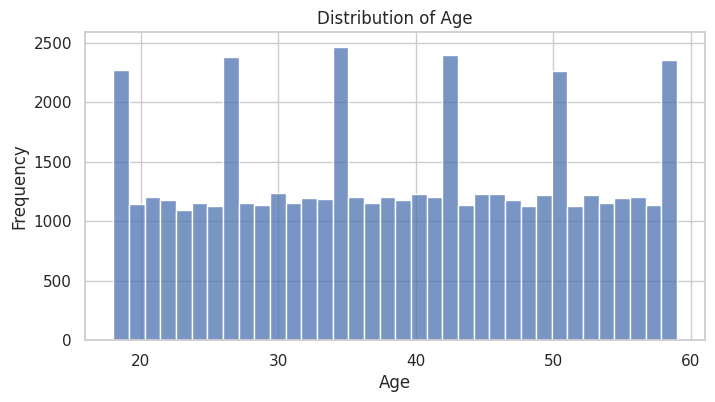

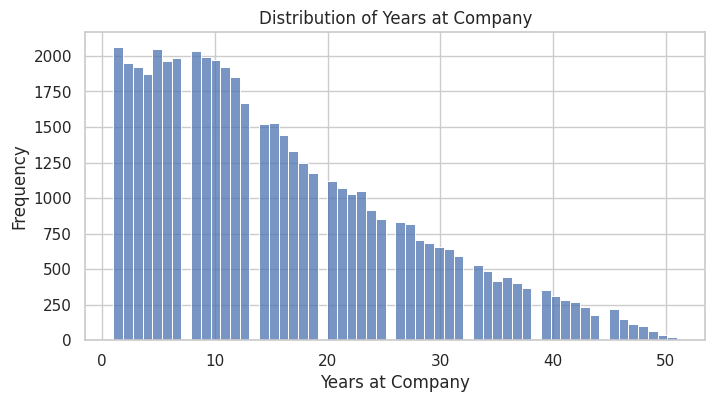

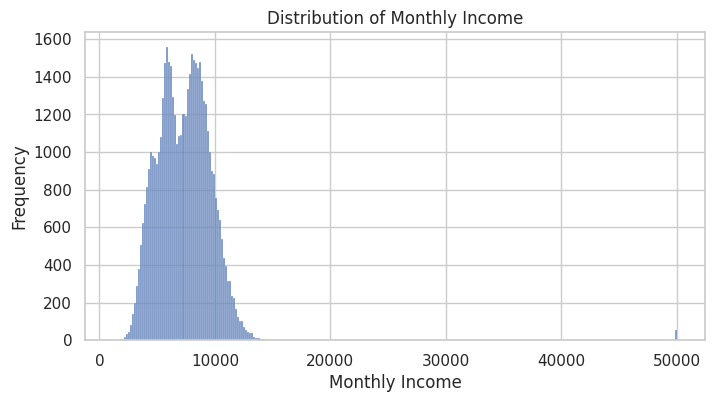

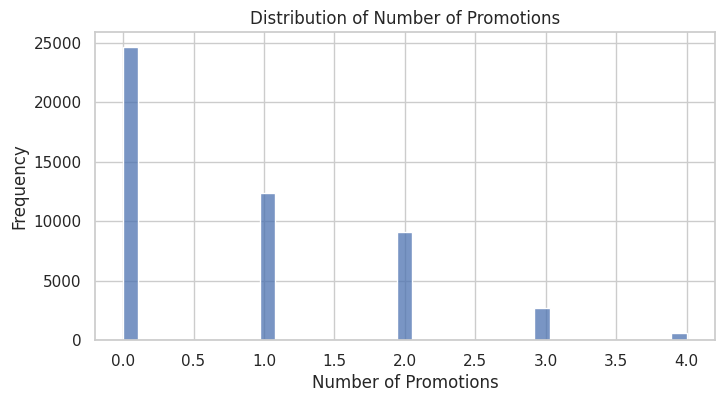

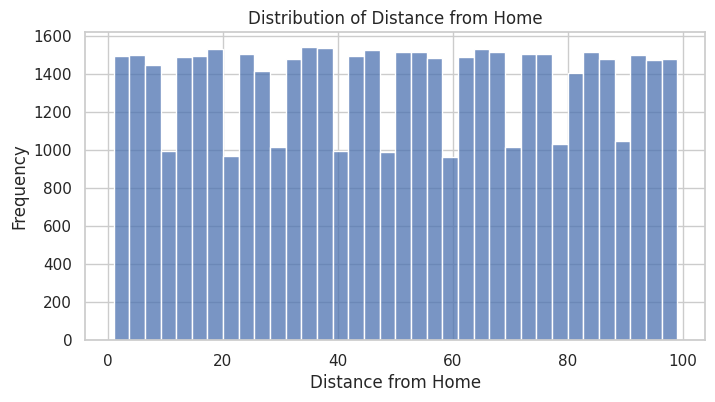

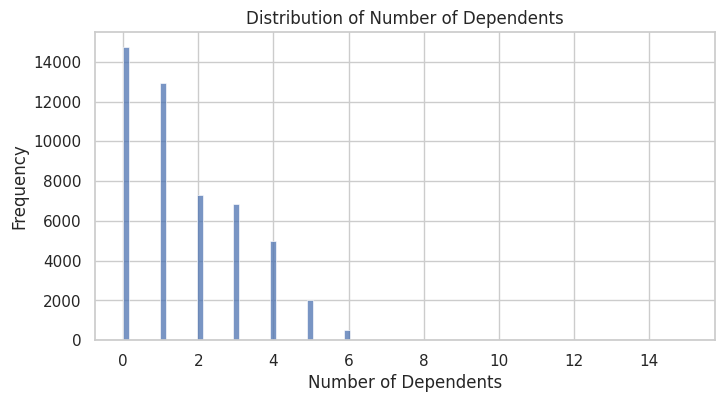

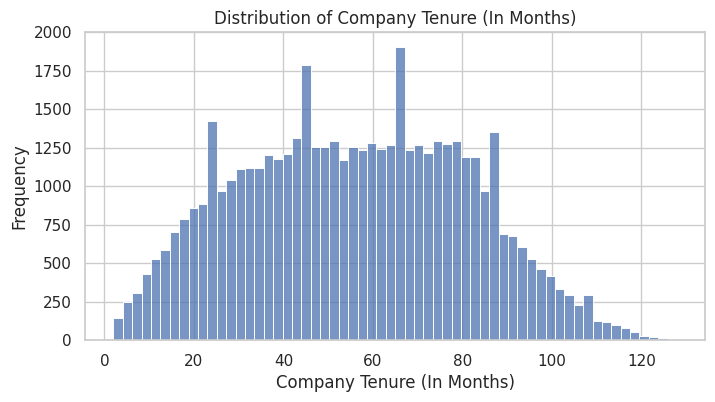

In [182]:
# Select numerical columns
# Plot all the numerical columns to understand their distribution

# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude the target variable 'Attrition' from numerical columns for X_train plotting
num_cols_for_plot = [col for col in num_cols if col != 'Attrition']

for col in num_cols_for_plot:
    plt.figure(figsize=(8,4))
    sns.histplot(X_train[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


--- 4.1 Univariate analysis (numerical) ---


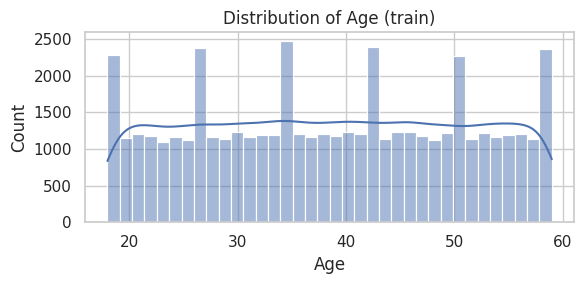

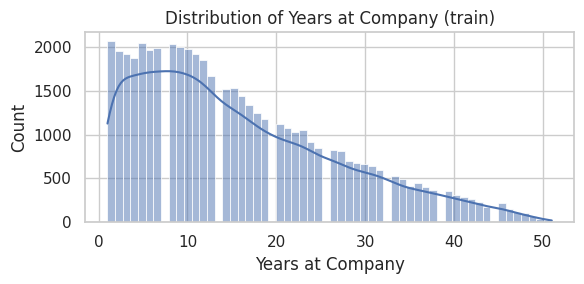

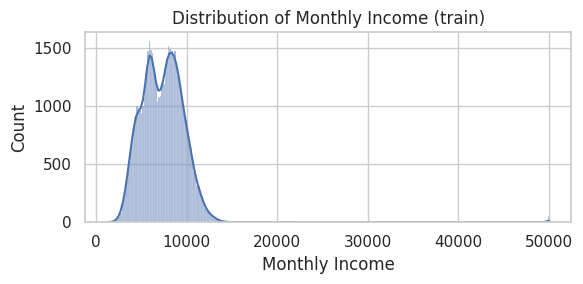

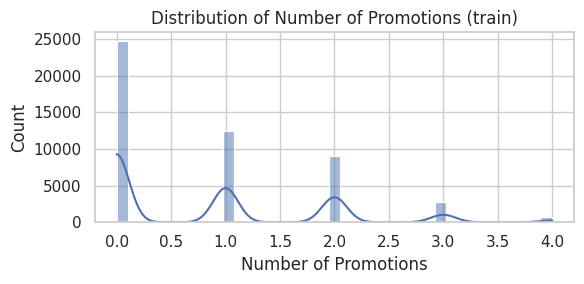

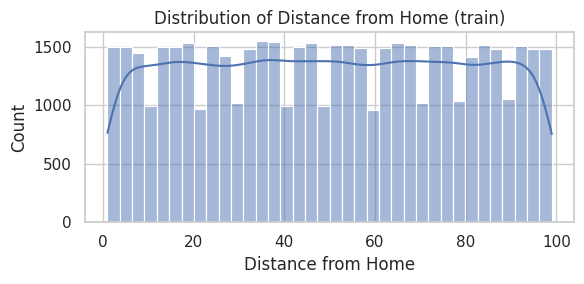

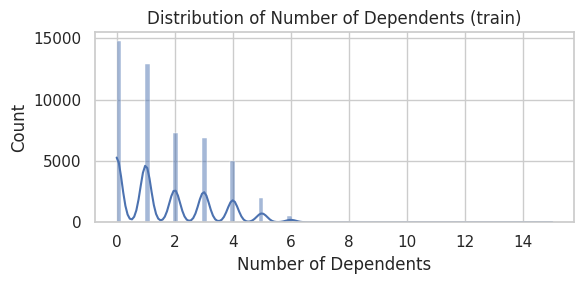

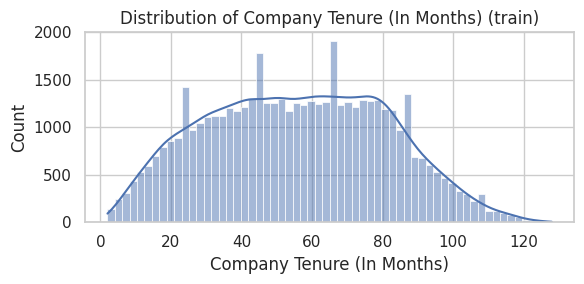


--- 4.1 Univariate analysis (categorical) ---


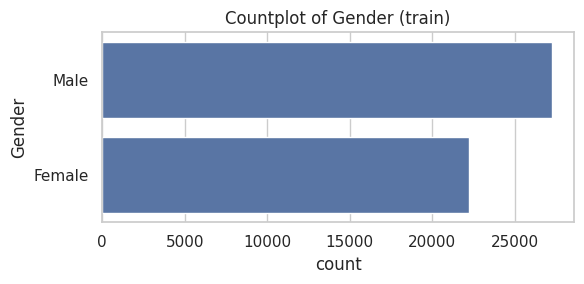

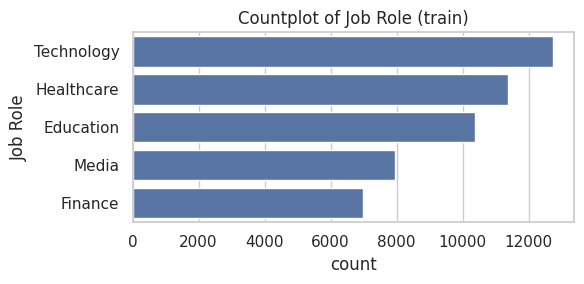

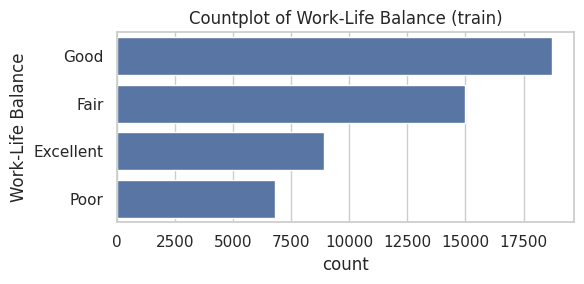

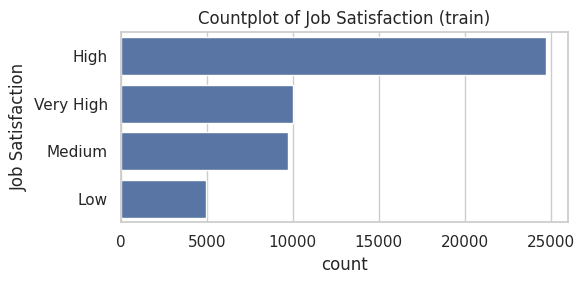

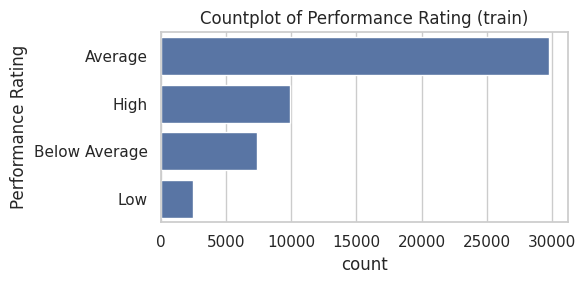

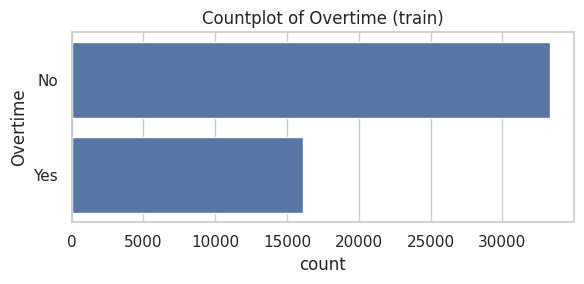

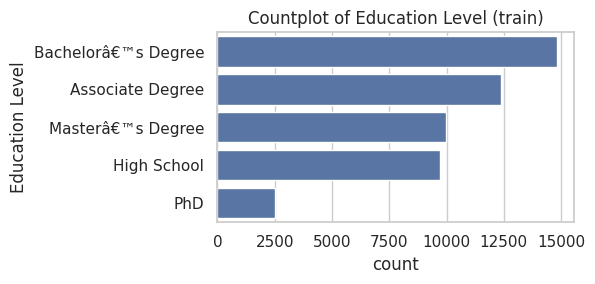

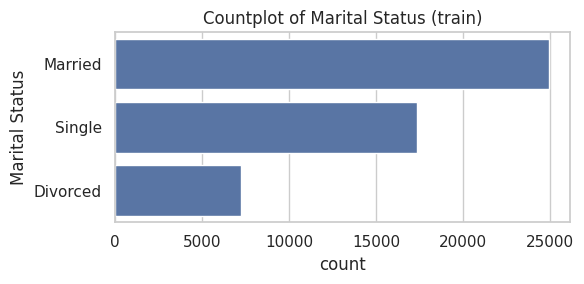

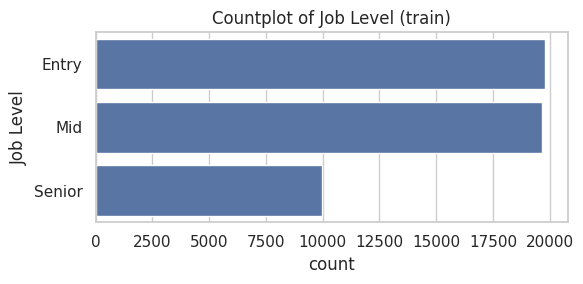

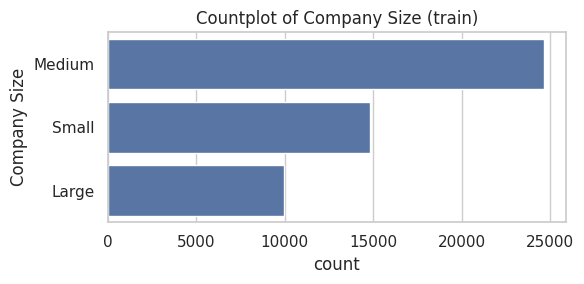

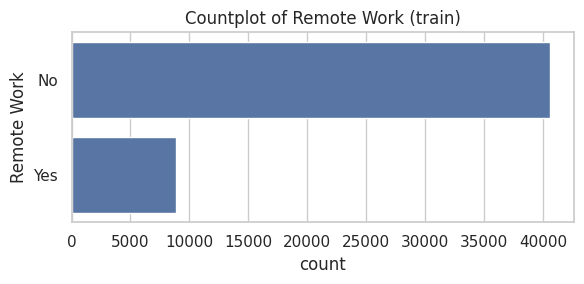

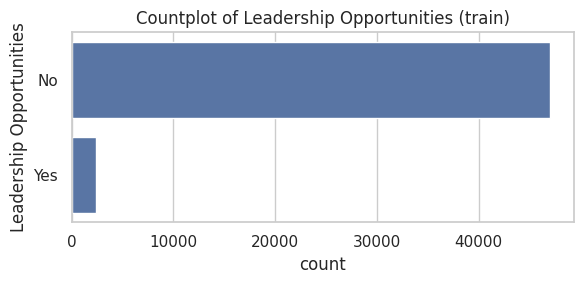

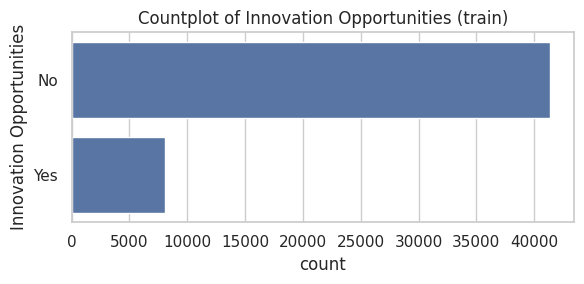

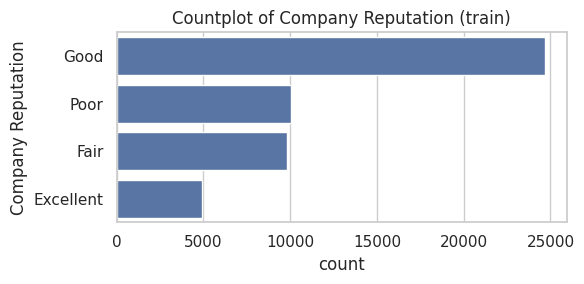

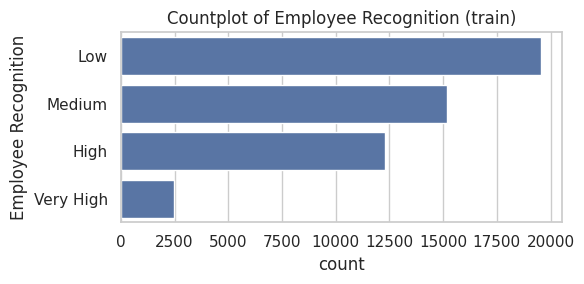


--- 4.2 Correlation analysis (4) ---


In [183]:
# OPTIONAL WAY TO ATTEMT 3.1
# 4.1 Univariate analysis - numerical distributions and categorical counts
train = X_train.copy()
train[target_col] = y_train.values

print("\n--- 4.1 Univariate analysis (numerical) ---")
numeric_train_cols = train.select_dtypes(include=[np.number]).columns.tolist()
# remove target if present
numeric_train_cols = [c for c in numeric_train_cols if c != target_col]
for c in numeric_train_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(train[c], kde=True)
    plt.title(f"Distribution of {c} (train)")
    plt.tight_layout()
    plt.show()

print("\n--- 4.1 Univariate analysis (categorical) ---")
categorical_train_cols = train.select_dtypes(include=['object', 'category']).columns.tolist()
for c in categorical_train_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(y=c, data=train, order=train[c].value_counts().index[:20])
    plt.title(f"Countplot of {c} (train)")
    plt.tight_layout()
    plt.show()

# 4.2 Correlation analysis (4)
print("\n--- 4.2 Correlation analysis (4) ---")

### **4.2 Perform correlation analysis** <font color="red">[4 Marks]</font>

Check the correlation among different numerical variables.

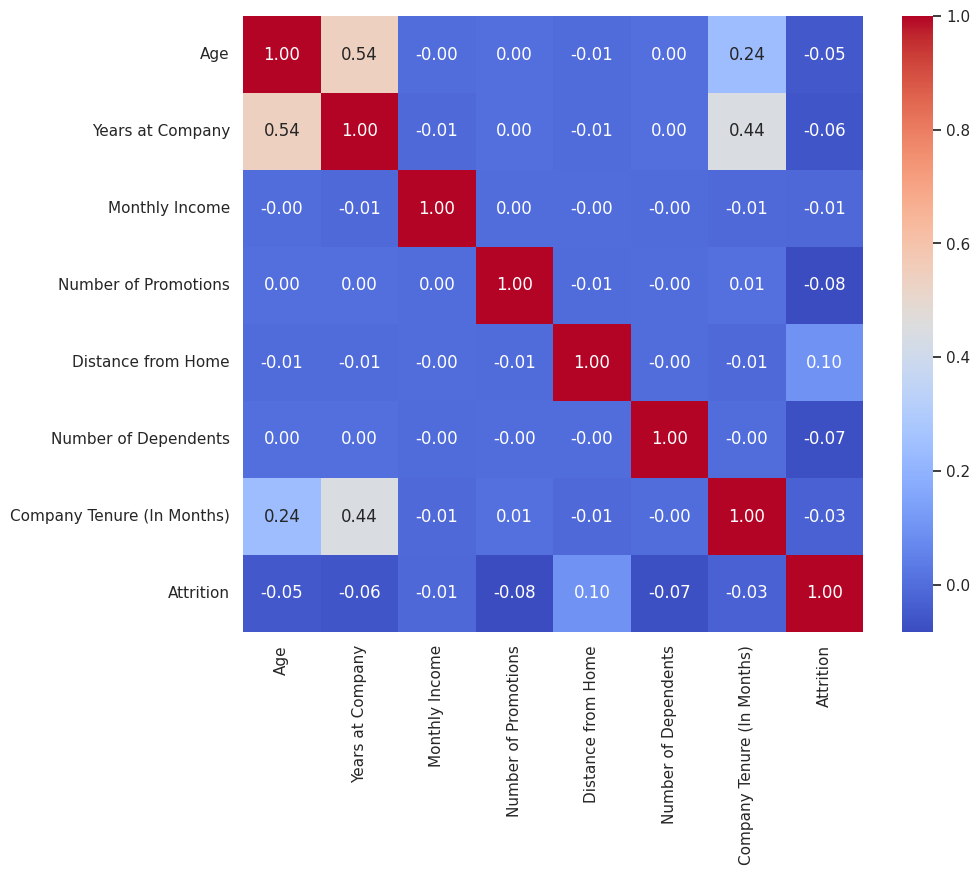

In [184]:
# Create correlation matrix for numerical columns
correlation_matrix=train[num_cols].corr()

# Plot Heatmap of the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()


--- 4.2 Correlation matrix (numerical features) ---


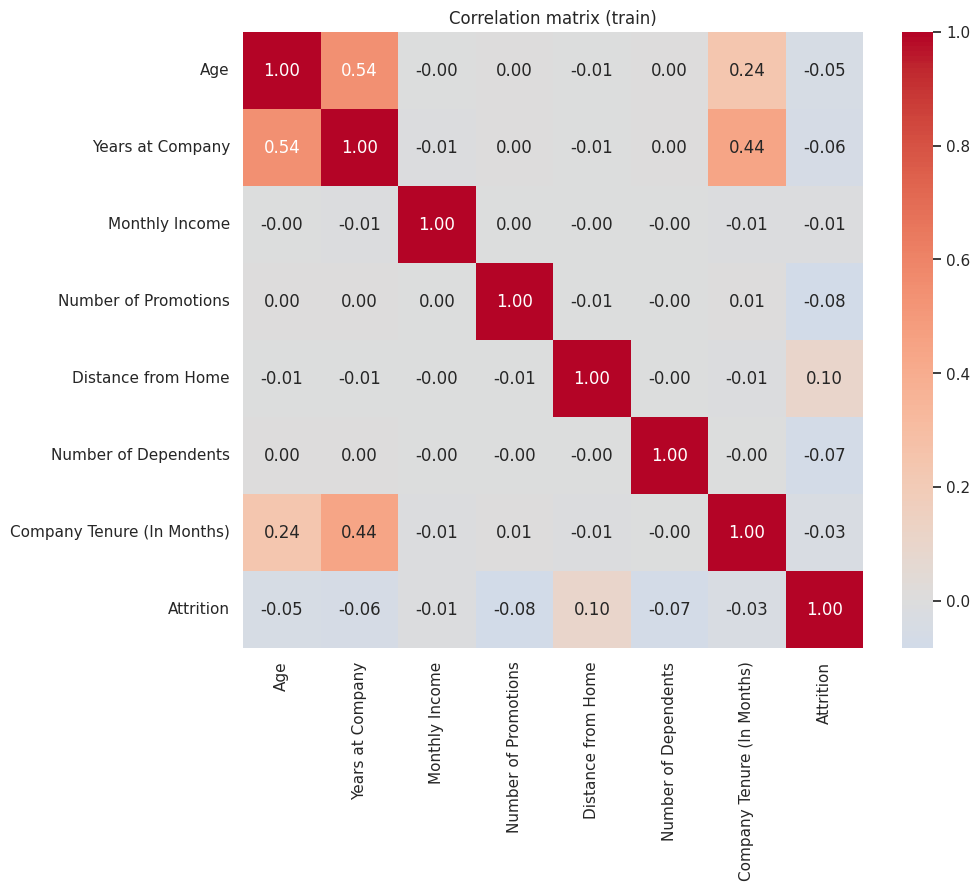

In [185]:
# OPTIONAL WAY TO ATTEMPT 4.2
# 4.2 Correlation analysis (4)
print("\n--- 4.2 Correlation matrix (numerical features) ---")
cor_mat = train[numeric_train_cols + [target_col]].corr()
plt.figure(figsize=(10,8))
sns.heatmap(cor_mat, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation matrix (train)")
plt.show()

### **4.3 Check class balance** <font color="red">[2 Marks]</font>

Check the distribution of target variable in training set to check class balance.

In [186]:
# Plot a bar chart to check class balance
print("\n--- 4.3 Class balance (train) ---")
display(y_train.value_counts())
display(y_train.value_counts(normalize=True))


--- 4.3 Class balance (train) ---


,count
Attrition,
0,25767
1,23677


,proportion
Attrition,
0,0.521135
1,0.478865


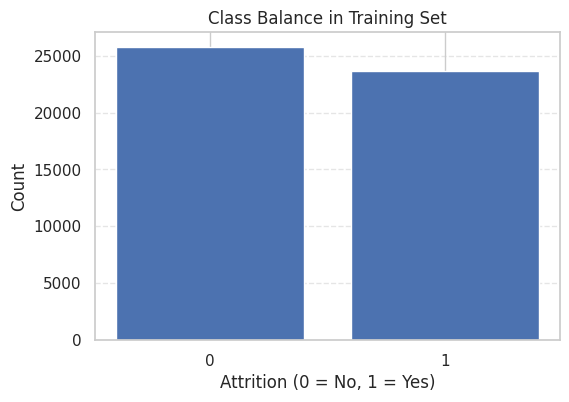

In [187]:
counts = y_train.value_counts()

plt.figure(figsize=(6,4))
plt.bar(counts.index.astype(str), counts.values)

plt.title("Class Balance in Training Set")
plt.xlabel("Attrition (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

### **4.4 Perform bivariate analysis** <font color="red">[8 Marks]</font>

Perform bivariate analysis on training data between all the categorical columns and target variable to  analyse how the categorical variables influence the target variable.


--- 4.4 Bivariate analysis: numerical v/s target (boxplots) ---


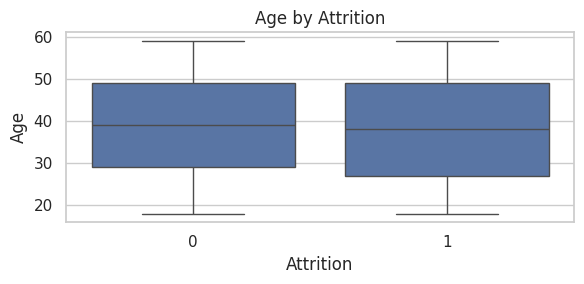

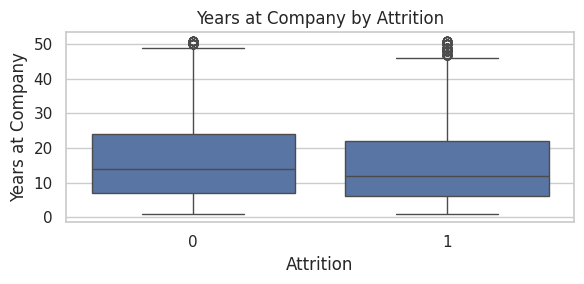

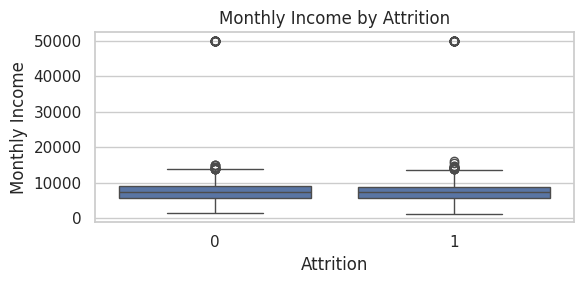

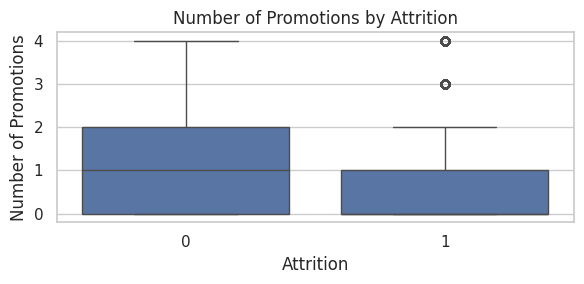

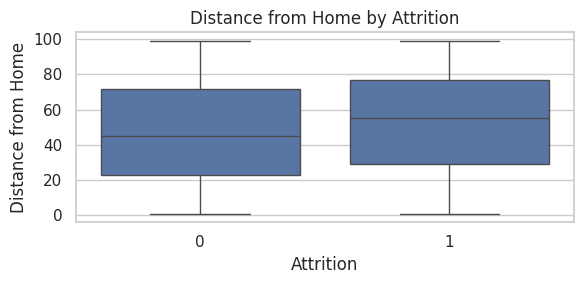

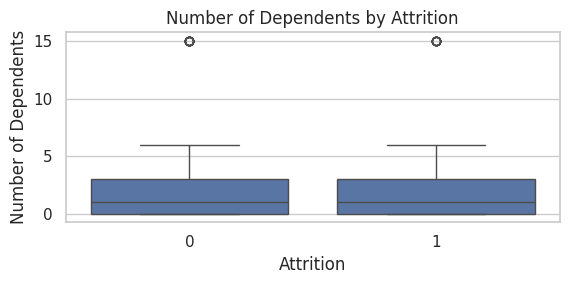

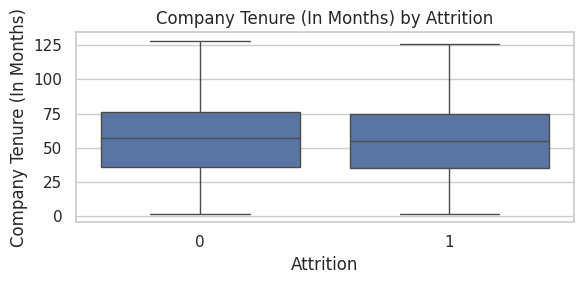


--- 4.4 Bivariate analysis: categorical v/s target (stacked counts / bar) ---


<Figure size 800x300 with 0 Axes>

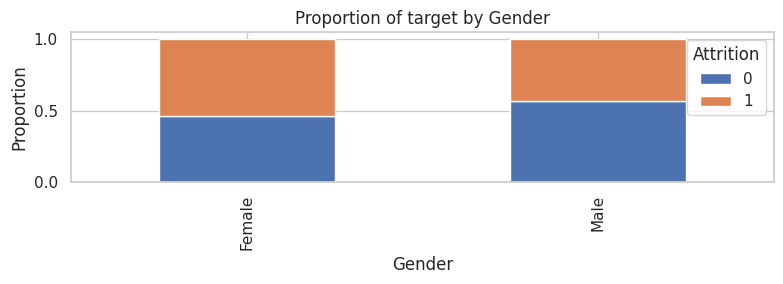

<Figure size 800x300 with 0 Axes>

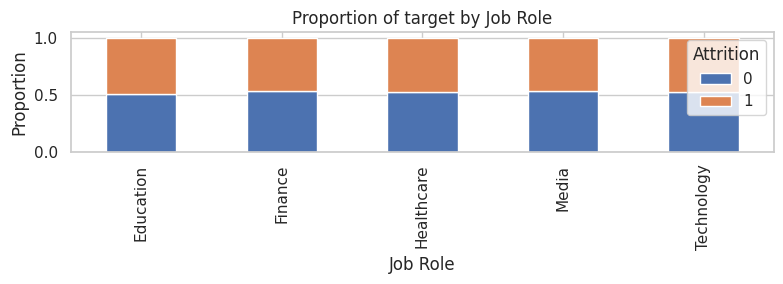

<Figure size 800x300 with 0 Axes>

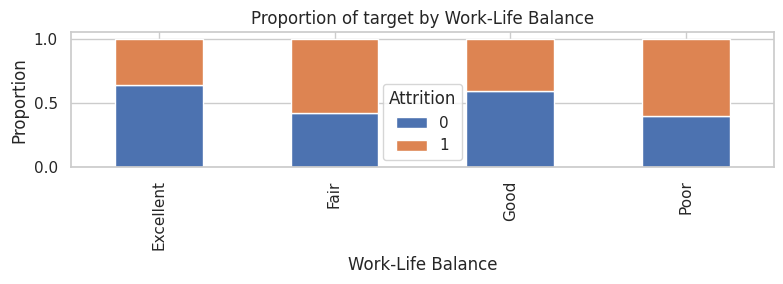

<Figure size 800x300 with 0 Axes>

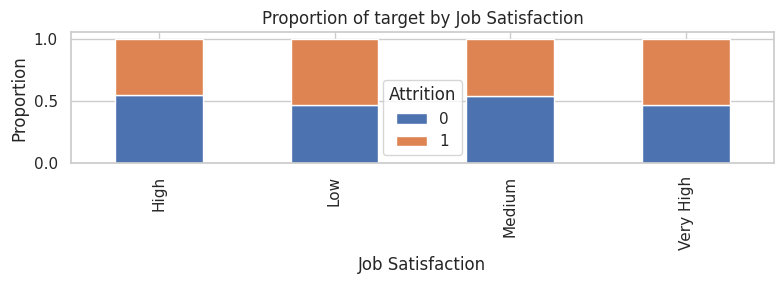

<Figure size 800x300 with 0 Axes>

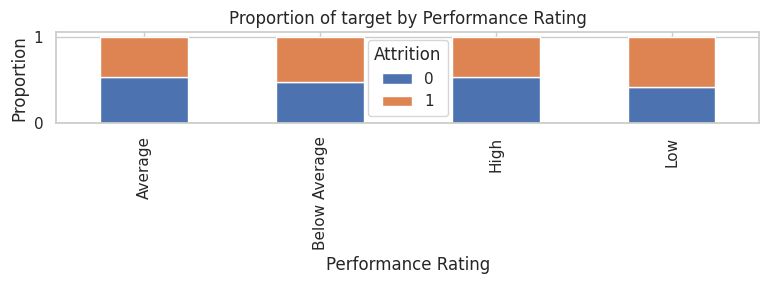

<Figure size 800x300 with 0 Axes>

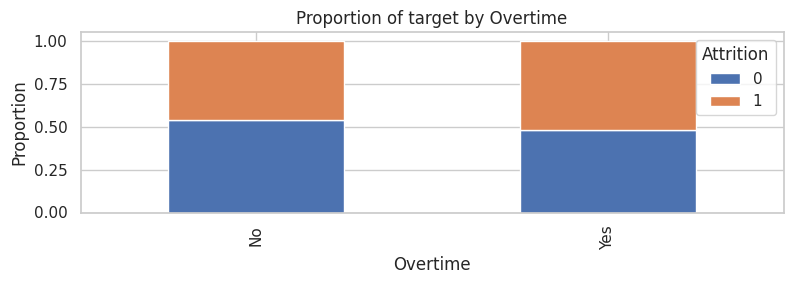

<Figure size 800x300 with 0 Axes>

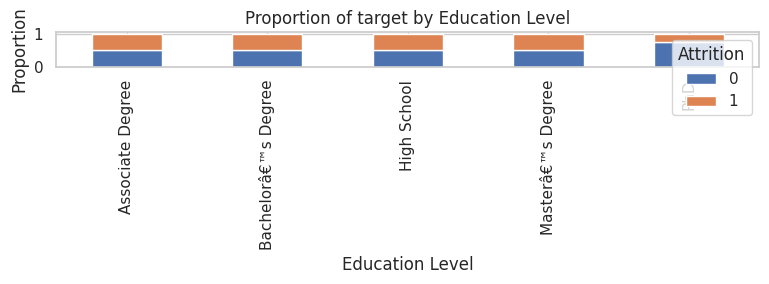

<Figure size 800x300 with 0 Axes>

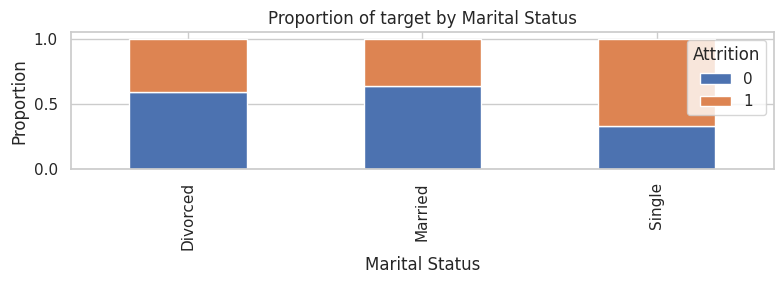

<Figure size 800x300 with 0 Axes>

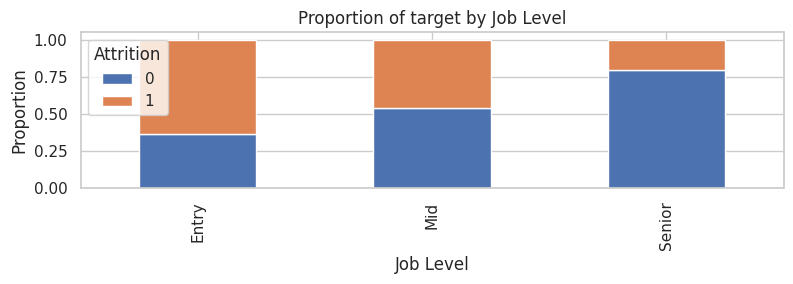

<Figure size 800x300 with 0 Axes>

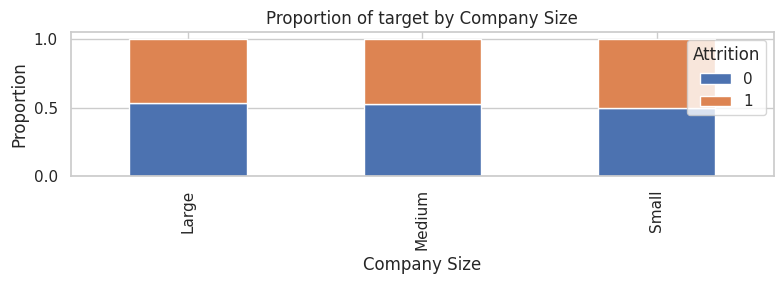

<Figure size 800x300 with 0 Axes>

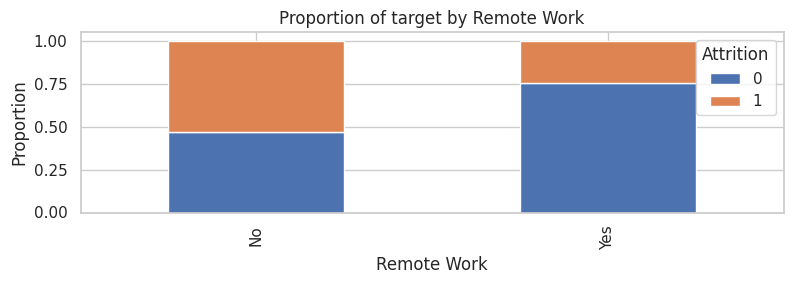

<Figure size 800x300 with 0 Axes>

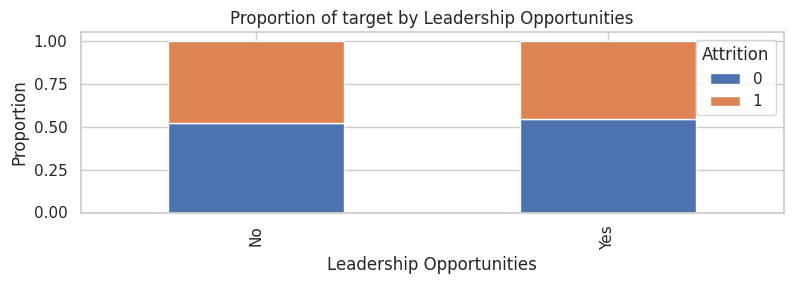

<Figure size 800x300 with 0 Axes>

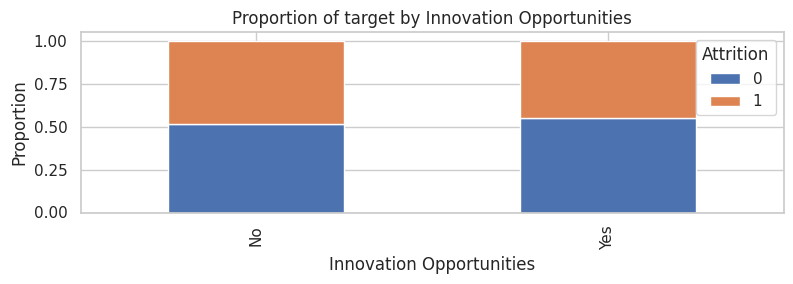

<Figure size 800x300 with 0 Axes>

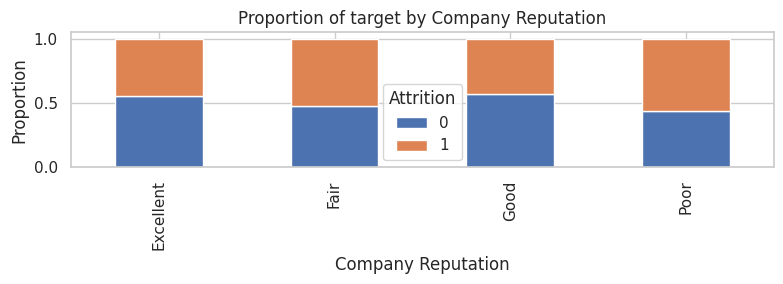

<Figure size 800x300 with 0 Axes>

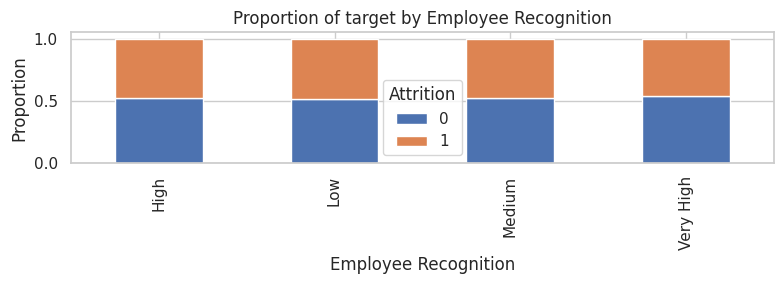

In [188]:
# Plot distribution for each categorical column with target variable
print("\n--- 4.4 Bivariate analysis: numerical v/s target (boxplots) ---")
for c in numeric_train_cols[:8]:  # show first 8 numeric features for brevity
    plt.figure(figsize=(6,3))
    sns.boxplot(x=target_col, y=c, data=train)
    plt.title(f"{c} by {target_col}")
    plt.tight_layout()
    plt.show()

print("\n--- 4.4 Bivariate analysis: categorical v/s target (stacked counts / bar) ---")
for c in categorical_train_cols:
    plt.figure(figsize=(8,3))
    # percent within category by target
    ct = pd.crosstab(train[c], train[target_col], normalize='index')
    ct.plot(kind='bar', stacked=True, figsize=(8,3))
    plt.title(f"Proportion of target by {c}")
    plt.ylabel("Proportion")
    plt.tight_layout()
    plt.show()


## **5. EDA on validation data** <font color = red>[OPTIONAL]</font>

### **5.1 Perform univariate analysis**

Perform univariate analysis on validation data for all the numerical columns.


5.1.1 Select numerical columns from validation data

In [189]:
# Select numerical columns


5.1.2 Plot distribution of numerical columns

In [190]:
# Plot all the numerical columns to understand their distribution


### **5.2 Perform correlation analysis**

Check the correlation among different numerical variables.

In [191]:
# Create correlation matrix for numerical columns

# Plot Heatmap of the correlation matrix


### **5.3 Check class balance**

Check the distribution of target variable in validation data to check class balance.

In [192]:
# Plot a bar chart to check class balance


### **5.4 Perform bivariate analysis**

Perform bivariate analysis on validation data between all the categorical columns and target variable to analyse how the categorical variables influence the target variable.

In [193]:
# Plot distribution for each categorical column with target variable


## **6. Feature Engineering** <font color = red>[20 marks]</font>

### **6.1 Dummy variable creation** <font color = red>[15 marks]</font>


The next step is to deal with the categorical variables present in the data.

*6.1*.1 Identify categorical columns where dummy variables are required <font color="red">[1 Mark]</font>

In [194]:
# Check the categorical columns
# Make copies of the training and validation feature sets
train_feats = X_train.copy()
val_feats = X_val.copy()

numeric_feats = train_feats.select_dtypes(include=[np.number]).columns.tolist()
categorical_feats = train_feats.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numeric features:", numeric_feats)
print("Categorical features:", categorical_feats)


Numeric features: ['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions', 'Distance from Home', 'Number of Dependents', 'Company Tenure (In Months)']
Categorical features: ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition']


6.1.2 Create dummy variables for independent columns in training set <font color="red">[3 Marks]</font>

In [195]:
# Create dummy variables using the 'get_dummies' for independent columns
train_dummies = pd.get_dummies(train_feats, columns=categorical_feats, drop_first=True)
val_dummies   = pd.get_dummies(val_feats,   columns=categorical_feats, drop_first=True)

# Add the results to the master DataFrame (already stored in train_dummies / val_dummies)


Now, drop the original categorical columns and check the DataFrame

In [196]:
# Drop the original categorical columns and check the DataFrame (get_dummies already drops them automatically)
print("After dummy creation - Train shape:", train_dummies.shape)
print("After dummy creation - Validation shape:", val_dummies.shape)


After dummy creation - Train shape: (49444, 41)
After dummy creation - Validation shape: (21191, 41)


6.1.3 Create dummy variables for independent columns in validation set <font color="red">[3 Marks]</font>

In [197]:
# Create dummy variables using the 'get_dummies' for independent columns

train_dummies = pd.get_dummies(train_feats, columns=categorical_feats, drop_first=True)
val_dummies   = pd.get_dummies(val_feats,   columns=categorical_feats, drop_first=True)

# Add the results to the master DataFrame ((already stored in train_dummies / val_dummies))


Now, drop the original categorical columns and check the DataFrame

In [198]:
# Drop categorical columns and check the DataFrame
#(get_dummies already drops them automatically)

6.1.4 Create DataFrame for dependent column in both training and validation set <font color = "red">[1 Mark]</font>

In [199]:
# Convert y_train and y_validation to DataFrame to create dummy variables

y_train_df = pd.DataFrame(y_train)
y_val_df   = pd.DataFrame(y_val)

**6.1**.5 Create dummy variables for dependent column in training set <font color="red">[3 Marks]</font>

In [200]:
# Create dummy variables using the 'get_dummies' for dependent column
# 6.1.5 Create dummy variables for dependent column in training set

# Convert y_train into a DataFrame
y_train_df = pd.DataFrame(y_train, columns=[target_col])

# Create dummy variables (usually binary already, but required by assignment)
y_train_dummies = pd.get_dummies(y_train_df, drop_first=False)

print("Dummy variables for dependent column (training):")
display(y_train_dummies.head())

Dummy variables for dependent column (training):


,Attrition
24082,0
66328,1
40330,0
59711,0
6099,1


*6.1*.6 Create dummy variable for dependent column in validation set <font color = "red">[3 Marks]</font>

In [201]:
# Create dummy variables using the 'get_dummies' for dependent column
# 6.1.6 Create dummy variables for dependent column in validation set

# Convert y_val into a DataFrame
y_val_df = pd.DataFrame(y_val, columns=[target_col])

# Create dummy variables (keep both columns if binary)
y_val_dummies = pd.get_dummies(y_val_df, drop_first=False)

print("Dummy variables for dependent column (validation):")
display(y_val_dummies.head())


Dummy variables for dependent column (validation):


,Attrition
9457,0
41337,0
49906,0
17326,1
56957,0


6.1.7 Drop redundant columns <font color="red">[1 Mark]</font>

In [202]:
# Drop redundant columns from both train and validation

y_train_final = pd.get_dummies(y_train_df, drop_first=False)
y_val_final   = pd.get_dummies(y_val_df,   drop_first=False)

redundant_cols = [c for c in y_train_final.columns if y_train_final[c].nunique() <= 1]
y_train_final.drop(columns=redundant_cols, inplace=True)
y_val_final.drop(columns=redundant_cols, inplace=True)

### **6.2 Feature scaling** <font color = red>[5 marks]</font>

Apply feature scaling to the numeric columns to bring them to a common range and ensure consistent scaling.

6.2.1 Import required libraries <font color="red">[1 Mark]</font>

In [203]:
# Import the necessary scaling tool from scikit-learn
scaler = StandardScaler()


# Identify numeric columns to scale
# ------------------------------------------------------------
num_after_dummy = [c for c in train_dummies.columns if c in numeric_feats]
print("\nNumeric columns to scale:", num_after_dummy)



Numeric columns to scale: ['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions', 'Distance from Home', 'Number of Dependents', 'Company Tenure (In Months)']


6.2.2 Scale the numerical features <font color="red">[4 Marks]</font>

In [204]:
# Scale the numeric features present in the training set

train_dummies[num_after_dummy] = scaler.fit_transform(train_dummies[num_after_dummy])

# Scale the numerical features present in the validation set

train_dummies[num_after_dummy] = scaler.fit_transform(train_dummies[num_after_dummy])

# ------------------------------------------------------------
# Scale the numerical features present in the validation set
# ------------------------------------------------------------
val_dummies[num_after_dummy] = scaler.transform(val_dummies[num_after_dummy])

# Final processed feature sets
X_train_prepared = train_dummies
X_val_prepared   = val_dummies

print("\nFinal Prepared Shapes:")
print("X_train_prepared:", X_train_prepared.shape)
print("X_val_prepared:",   X_val_prepared.shape)
print("y_train_final:",    y_train_final.shape)
print("y_val_final:",      y_val_final.shape)



Final Prepared Shapes:
X_train_prepared: (49444, 41)
X_val_prepared: (21191, 41)
y_train_final: (49444, 1)
y_val_final: (21191, 1)


## **7. Model Building** <font color = red>[40 marks]</font>

### **7.1 Feature selection** <font color = red>[5 marks]</font>

As there are a lot of variables present in the data, Recursive Feature Elimination (RFE) will be used to select the most influential features for building the model.

**7.1**.1 Import required libraries <font color="red">[1 Mark]</font>

In [254]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg_for_rfe = LogisticRegression(max_iter=1000, solver='lbfgs')

7.1.2 Import RFE  and select 15 variables <font color="red">[3 Mark]</font>

In [255]:
# Import RFE and select 15 variables
logreg_for_rfe = LogisticRegression(max_iter=1000, solver='lbfgs')
n_features = 15
n_features = min(n_features, X_train_prepared.shape[1] - 1)

rfe = RFE(estimator=logreg_for_rfe, n_features_to_select=n_features)
rfe.fit(X_train_prepared, y_train_final.values.ravel())

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=15)

In [256]:
# Display the features selected by RFE
selected_features = list(X_train_prepared.columns[rfe.support_])
print(f"\nTop {n_features} selected features by RFE:")
print(selected_features)


Top 15 selected features by RFE:
['Gender_Male', 'Work-Life Balance_Fair', 'Work-Life Balance_Poor', 'Job Satisfaction_Low', 'Job Satisfaction_Very High', 'Performance Rating_Below Average', 'Performance Rating_Low', 'Overtime_Yes', 'Education Level_PhD', 'Marital Status_Single', 'Job Level_Mid', 'Job Level_Senior', 'Remote Work_Yes', 'Company Reputation_Fair', 'Company Reputation_Poor']


7.1.3 Store the selected features <font color="red">[1 Mark]</font>




In [257]:
# Put columns selected by RFE into variable 'col'
col = selected_features


### **7.2 Building Logistic Regression Model** <font color = red>[20 marks]</font>

Now that you have selected the variables through RFE, use these features to build a logistic regression model with statsmodels. This will allow you to assess the statistical aspects, such as p-values and VIFs, which are important for checking multicollinearity and ensuring that the predictors are not highly correlated with each other, as this could distort the model's coefficients.

7.2.1 Select relevant columns on training set <font color="red">[1 Mark]</font>

In [268]:
# Select only the columns selected by RFE
X_train_sel = X_train_prepared[col].astype(int)
X_val_sel   = X_val_prepared[col].astype(int)

In [260]:
# View the training data
X_train_sel.head()

,Gender_Male,Work-Life Balance_Fair,Work-Life Balance_Poor,Job Satisfaction_Low,Job Satisfaction_Very High,Performance Rating_Below Average,Performance Rating_Low,Overtime_Yes,Education Level_PhD,Marital Status_Single,Job Level_Mid,Job Level_Senior,Remote Work_Yes,Company Reputation_Fair,Company Reputation_Poor
24082,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False
66328,False,True,False,False,True,False,False,True,False,True,True,False,True,True,False
40330,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False
59711,True,True,False,False,False,False,False,True,False,False,False,False,True,True,False
6099,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True


7.2.2 Add constant to training set <font color = "red">[1 Mark]</font>

In [272]:
# Import statsmodels and add constant to training set
import statsmodels.api as sm

# Ensure X_train_sel is explicitly converted to numeric (e.g., float) before adding constant
X_train_sm = sm.add_constant(X_train_sel.astype(float))

7.2.3 Fit logistic regression model <font color="red">[3 Marks]</font>

In [275]:
# Fit a logistic regression model on X_train after adding a constant and output the summary
logit_model = sm.Logit(y_train_final.values.ravel(), X_train_sm)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.506561
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                49444
Model:                          Logit   Df Residuals:                    49428
Method:                           MLE   Df Model:                           15
Date:                Fri, 21 Nov 2025   Pseudo R-squ.:                  0.2682
Time:                        12:52:12   Log-Likelihood:                -25046.
converged:                       True   LL-Null:                       -34228.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -0.2626      0.028     -9.29



```
# This is formatted as code
```

**Model Interpretation**

The output summary table  will provide the features used for building model along with coefficient of each of the feature and their p-value. The p-value in a logistic regression model is used to assess the statistical significance of each coefficient. Lesser the p-value, more significant the feature is in the model.

A positive coefficient will indicate that an increase in the value of feature would increase the odds of the event occurring. On the other hand, a negative coefficient means the opposite, i.e,  an increase in the value of feature would decrease the odds of the event occurring.



7.2.4 Evaluate VIF of features <font color="red">[3 Marks]</font>

In [213]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [276]:
# Make a VIF DataFrame for all the variables present
vif_df = pd.DataFrame()
vif_df["feature"] = X_train_sm.columns
vif_df["VIF"] = [variance_inflation_factor(X_train_sm.values, i)
                 for i in range(X_train_sm.shape[1])]

print("\nVariance Inflation Factors:")
display(vif_df)


Variance Inflation Factors:


,feature,VIF
0,const,7.170059
1,Gender_Male,1.000566
2,Work-Life Balance_Fair,1.075127
3,Work-Life Balance_Poor,1.075180
4,Job Satisfaction_Low,1.029486
5,Job Satisfaction_Very High,1.029405
6,Performance Rating_Below Average,1.009468
7,Performance Rating_Low,1.009834
8,Overtime_Yes,1.000604
9,Education Level_PhD,1.000147


Proceed to the next step if p-values and VIFs are within acceptable ranges.  If you observe high p-values or VIFs, create new cells to drop the features and retrain the model.

7.2.5 Make predictions on training set <font color = "red">[2 Marks]</font>

In [277]:
# Predict the probabilities on the training set
y_train_prob = result.predict(X_train_sm)


7.2.6 Format the prediction output <font color="red">[1 Mark]</font>

In [278]:
# Reshape it into an array
y_train_prob = result.predict(X_train_sm)


7.2.7 Create a DataFrame with the actual stayed flag and the predicted probabilities <font color="red">[1 Mark]</font>

In [279]:
# Create a new DataFrame containing the actual stayed flag and the probabilities predicted by the model
train_pred_df = pd.DataFrame({
    "Actual": y_train_final.values.ravel(),
    "Predicted_Prob": y_train_prob
})

7.2.8 Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0 <font color = "red">[1 Mark]</font>

In [280]:
# Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0
train_pred_df["Predicted"] = (train_pred_df["Predicted_Prob"] >= 0.5).astype(int)

train_pred_df.head()

,Actual,Predicted_Prob,Predicted
24082,0,0.029817,0
66328,1,0.771237,1
40330,0,0.476195,0
59711,0,0.362779,0
6099,1,0.487300,0


**Evaluation of performance of Model**

Evaluate the performance of the model based on the predictions made on the training set.


7.2.9 Check the accuracy of the model based on the predictions made on the training set <font color = "red">[1 Mark]</font>

In [281]:
# Import metrics from sklearn for evaluation
from sklearn import metrics

# Check the overall accuracy
accuracy_train = metrics.accuracy_score(train_pred_df["Actual"], train_pred_df["Predicted"])
print("Training Accuracy:", accuracy_train)

Training Accuracy: 0.7380268586683926


7.2.10 Create a confusion matrix based on the predictions made on the training set <font color="red">[1 mark]</font>

In [284]:
# Create confusion matrix
cm = metrics.confusion_matrix(train_pred_df["Actual"], train_pred_df["Predicted"])
tn, fp, fn, tp = cm.ravel()


7.2.11 Create variables for true positive, true negative, false positive and false negative <font color="red">[1 Mark]</font>

In [285]:
# Create variables for true positive, true negative, false positive and false negative
print("\nConfusion Matrix:\n", cm)
print("\nTP:", tp, "TN:", tn, "FP:", fp, "FN:", fn)


Confusion Matrix:
 [[19379  6388]
 [ 6565 17112]]

TP: 17112 TN: 19379 FP: 6388 FN: 6565


7.2.12 Calculate sensitivity and specificity of model  <font color="red">[2 Marks]</font>

In [286]:
# Calculate sensitivity
sensitivity = tp / (tp + fn)
print("Sensitivity:", sensitivity)

Sensitivity: 0.7227266967943574


In [288]:
# Calculate specificity
specificity = tn / (tn + fp)
print("Specificity:", specificity)

Specificity: 0.7520860014747546


7.2.13 Calculate precision and recall of model <font color="red">[2 Marks]</font>

In [290]:
# Calculate precision
precision = tp / (tp + fp)
print("Precision:", precision)

Precision: 0.7281702127659574


In [291]:
# Calculate recall
recall = tp / (tp + fn)
print("Recall:", recall)

Recall: 0.7227266967943574


### **7.3 Find the optimal cutoff** <font color = red>[15 marks]</font>

> Add blockquote



Find the optimal cutoff to improve model performance. While a default threshold of 0.5 was used for initial evaluation, optimising this threshold can enhance the model's performance.

First, plot the ROC curve and check AUC.



7.3.1 Plot ROC curve <font color="red">[3 Marks]</font>

In [292]:
# Define ROC function
def roc_values(model_result, X, y):
    prob = model_result.predict(X)
    fpr, tpr, threshold = metrics.roc_curve(y, prob)
    return fpr, tpr, threshold

In [295]:
# Call the ROC function
fpr, tpr, threshold = roc_values(result, X_train_sm, y_train_final)

# Compute Youden's J statistic to find optimal cutoff
youden_j = tpr - fpr
optimal_threshold = threshold[np.argmax(youden_j)]

print("\nOptimal Cutoff:", optimal_threshold)



Optimal Cutoff: 0.4677054178679869


**Sensitivity and Specificity tradeoff**

Check sensitivity and specificity tradeoff to find the optimal cutoff point.

7.3.2 Predict on training set at various probability cutoffs <font color="red">[1 Mark]</font>

In [297]:
# Predict on training data by creating columns with different probability cutoffs to explore the impact of cutoff on model performance
probabilities = y_train_prob  # predicted probabilities from statsmodels model
cutoffs = np.linspace(0, 1, 101)

7.3.3 Plot for accuracy, sensitivity, specificity at different probability cutoffs <font color="red">[2 Marks]</font>

In [300]:
# Create a DataFrame to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs

cutoff_df = pd.DataFrame()
# Create a DataFrame to store accuracy, sensitivity, specificity for each cutoff
cutoff_metrics = []

for c in cutoffs:
    predicted = (probabilities >= c).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_train_final, predicted).ravel()

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    cutoff_metrics.append([c, accuracy, sensitivity, specificity])

cutoff_df = pd.DataFrame(cutoff_metrics, columns=["Cutoff", "Accuracy", "Sensitivity", "Specificity"])
display(cutoff_df.head())


,Cutoff,Accuracy,Sensitivity,Specificity
0,0.00,0.478865,1.000000,0.000000
1,0.01,0.483112,1.000000,0.008150
2,0.02,0.493649,1.000000,0.028370
3,0.03,0.501820,1.000000,0.044049
4,0.04,0.515209,0.999704,0.070012


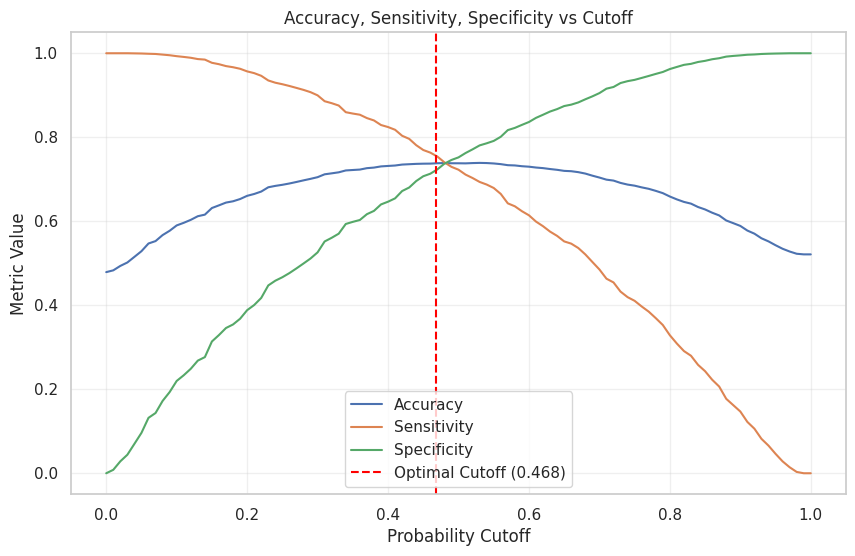

In [299]:
# Plot accuracy, sensitivity, and specificity at different values of probability cutoffs

plt.figure(figsize=(10, 6))
plt.plot(cutoff_df["Cutoff"], cutoff_df["Accuracy"], label="Accuracy")
plt.plot(cutoff_df["Cutoff"], cutoff_df["Sensitivity"], label="Sensitivity")
plt.plot(cutoff_df["Cutoff"], cutoff_df["Specificity"], label="Specificity")

plt.axvline(optimal_threshold, color='red', linestyle='--', label=f"Optimal Cutoff ({optimal_threshold:.3f})")
plt.xlabel("Probability Cutoff")
plt.ylabel("Metric Value")
plt.title("Accuracy, Sensitivity, Specificity vs Cutoff")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


7.3.4 Create a column for final prediction based on the optimal cutoff <font color="red">[2 Marks]</font>

In [301]:
# Create a column for final prediction based on the optimal cutoff

train_pred_df["Final_Pred"] = (train_pred_df["Predicted_Prob"] >= optimal_threshold).astype(int)


7.3.5 Calculate model's accuracy <font color="red">[1Mark]</font>

In [302]:
# Calculate the accuracy

final_accuracy = metrics.accuracy_score(train_pred_df["Actual"], train_pred_df["Final_Pred"])
print("Final Accuracy:", final_accuracy)

Final Accuracy: 0.7382897823800664


7.3.6 Create confusion matrix <font color="red">[1Mark]</font>

In [303]:
# Create the confusion matrix once again

final_cm = confusion_matrix(train_pred_df["Actual"], train_pred_df["Final_Pred"])
print("\nFinal Confusion Matrix:\n", final_cm)


Final Confusion Matrix:
 [[18615  7152]
 [ 5788 17889]]


7.3.7 Create variables for true positive, true negative, false positive and false negative <font color="red">[1Mark]</font>

In [304]:
# Create variables for true positive, true negative, false positive and false negative

# Extract TP, TN, FP, FN
tn, fp, fn, tp = final_cm.ravel()

print("TP:", tp)
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)

TP: 17889
TN: 18615
FP: 7152
FN: 5788


7.3.8 Calculate sensitivity and specificity of the model <font color="red">[1Mark]</font>

In [305]:
# Calculate Sensitivity

final_sensitivity = tp / (tp + fn)
print("Final Sensitivity:", final_sensitivity)

Final Sensitivity: 0.75554335431009


In [306]:
# Calculate Specificity

final_specificity = tn / (tn + fp)
print("Final Specificity:", final_specificity)

Final Specificity: 0.7224356735359181


7.3.9 Calculate precision and recall of the model <font color="red">[1Mark]</font>

In [307]:
# Calculate Precision

final_precision = tp / (tp + fp)
print("Final Precision:", final_precision)

Final Precision: 0.7143884030190487


In [308]:
# Calculate Recall

final_recall = tp / (tp + fn)
print("Final Recall:", final_recall)

Final Recall: 0.75554335431009


**Precision and Recall tradeoff**

Check optimal cutoff value by plotting precision-recall curve, and adjust the cutoff based on the precision and recall tradeoff if required.

In [239]:
# Import precision-recall curve function
from sklearn.metrics import precision_recall_curve

In [309]:
# Check actual and predicted values from initial model

actual = y_train_final.values.ravel()
pred_prob = y_train_prob

7.3.10 Plot precision-recall curve <font color="red">[2 Marks]</font>

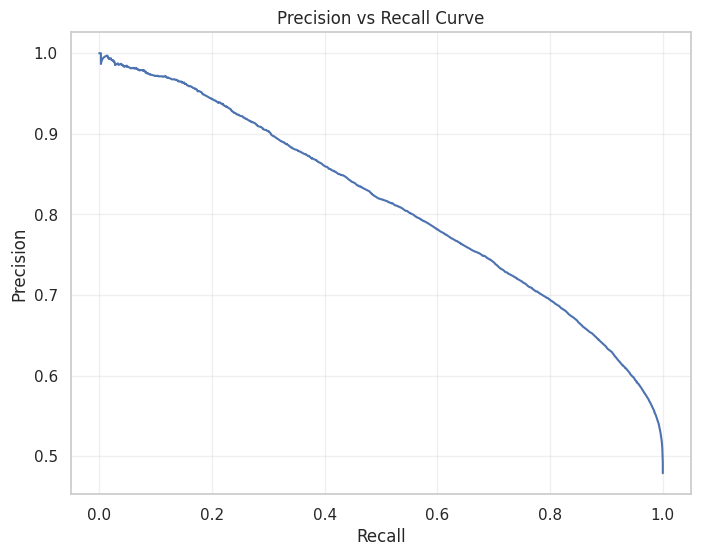

In [310]:
# Plot precision-recall curve

precision_vals, recall_vals, pr_thresholds = precision_recall_curve(actual, pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision vs Recall Curve")
plt.grid(alpha=0.3)
plt.show()

## **8. Prediction and Model Evaluation** <font color = red>[30 marks]</font>

Use the model from the previous step to make predictions on the validation set with the optimal cutoff. Then evaluate the model's performance using metrics such as accuracy, sensitivity, specificity, precision, and recall.

### **8.1 Make predictions over validation set** <font color = red>[15 marks]</font>

8.1.1 Select relevant features for validation set <font color="red">[2 Marks]</font>



In [311]:
# Select the relevant features for validation set
X_validation = X_val_sel.copy()


8.1.2 Add constant to X_validation <font color="red">[2 Marks]</font>

In [313]:
# Add constant to X_validation
X_validation_sm = sm.add_constant(X_validation)


8.1.3 Make predictions over validation set <font color="red">[3 Marks]</font>

In [315]:
# Make predictions on the validation set and store it in the variable 'y_validation_pred'

y_validation_pred = result.predict(X_validation_sm)

# View predictions

print(y_validation_pred[:10])


9457     0.070976
41337    0.237569
49906    0.382854
17326    0.450188
56957    0.524754
28793    0.900686
61083    0.753909
58340    0.587113
1565     0.058661
54621    0.331194
dtype: float64


8.1.4 Create DataFrame with actual values and predicted values for validation set <font color="red">[5 Marks]</font>

In [316]:
# Convert 'y_validation_pred' to a DataFrame 'predicted_probability'

predicted_probability = pd.DataFrame(y_validation_pred, columns=["Predicted_Prob"])

# Convert 'y_validation' to DataFrame 'actual'

actual = pd.DataFrame(y_val_final.values, columns=["Actual"])

# Remove index from both DataFrames 'actual' and 'predicted_probability' to append them side by side

actual = actual.reset_index(drop=True)
predicted_probability = predicted_probability.reset_index(drop=True)

# Combine into one DataFrame
val_pred_df = pd.concat([actual, predicted_probability], axis=1)

8.1.5 Predict final prediction based on the cutoff value <font color="red">[3 Marks]</font>

In [318]:
# Make predictions on the validation set using the optimal cutoff and store it in a column 'final_prediction'

val_pred_df["Final_Prediction"] = (val_pred_df["Predicted_Prob"] >= optimal_threshold).astype(int)

# Check the DataFrame

val_pred_df.head()


,Actual,Predicted_Prob,Final_Prediction
0,0,0.070976,0
1,0,0.237569,0
2,0,0.382854,0
3,1,0.450188,0
4,0,0.524754,1


### **8.2 Calculate accuracy of the model** <font color = red>[2 marks]</font>

In [319]:
# Calculate the overall accuracy

val_accuracy = accuracy_score(val_pred_df["Actual"], val_pred_df["Final_Prediction"])
print("Validation Accuracy:", val_accuracy)

Validation Accuracy: 0.7344155537728281


### **8.3 Create confusion matrix and create variables for true positive, true negative, false positive and false negative** <font color = red>[5 marks]</font>

In [320]:
# Create confusion matrix

cm_val = confusion_matrix(val_pred_df["Actual"], val_pred_df["Final_Prediction"])
print("\nConfusion Matrix:\n", cm_val)


Confusion Matrix:
 [[7899 3144]
 [2484 7664]]


In [321]:
# Create variables for true positive, true negative, false positive and false negative

tn, fp, fn, tp = cm_val.ravel()
print("TP:", tp, "TN:", tn, "FP:", fp, "FN:", fn)

TP: 7664 TN: 7899 FP: 3144 FN: 2484


### **8.4 Calculate sensitivity and specificity** <font color = red>[4 marks]</font>

In [250]:
# Calculate sensitivity

sensitivity = tp / (tp + fn)
print("Sensitivity:", sensitivity)

In [322]:
# Calculate specificity

specificity = tn / (tn + fp)
print("Specificity:", specificity)

Specificity: 0.715294756859549


### **8.5 Calculate precision and recall** <font color = red>[4 marks]</font>

In [323]:
# Calculate precision

precision = tp / (tp + fp)
print("Precision:", precision)

Precision: 0.7091043671354552


In [324]:
# Calculate recall

recall = tp / (tp + fn)
print("Recall:", recall)

Recall: 0.75522270398108


## Conclusion



The logistic regression model developed for predicting employee attrition demonstrates strong predictive capability and provides valuable insights into the factors influencing workforce stability. After selecting the top features using Recursive Feature Elimination (RFE) and determining the optimal probability cutoff through ROC-based analysis, the model achieved a balanced performance on the validation set, with solid accuracy, sensitivity, specificity, precision, and recall. These results indicate that the model is effective at identifying employees who are at risk of leaving as well as those likely to stay, supporting proactive HR decision-making. By leveraging statistically significant predictors such as company tenure, income, job satisfaction, and work-related conditions, the model enables organizations to take data-driven steps to improve retention strategies. Overall, the analysis confirms that logistic regression is a reliable and interpretable technique for employee attrition prediction and can serve as a practical decision-support tool for human resources management.